In this short notebook, we will give a few examples on how to use the $E(B-V)$ map provided in Lenz, Hensley & Doré (2017). We distribute this map in the HEALPix format ([Górski et al. 2005](http://adsabs.harvard.edu/abs/2005ApJ...622..759G)), so [`healpy`](http://healpy.readthedocs.io/en/latest/) needs to be installed. Moreover, we use [`astropy`](http://astropy.org) for coordinate conversions.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # for high-resolution displays e.g. newer MacBooks

In [2]:
from __future__ import print_function
import numpy as np
import healpy as hp
import pandas as pd
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
import warnings
warnings.filterwarnings('ignore')

In [3]:
ebv_map = hp.read_map('ebv_lhd.hpx.fits', verbose=False)

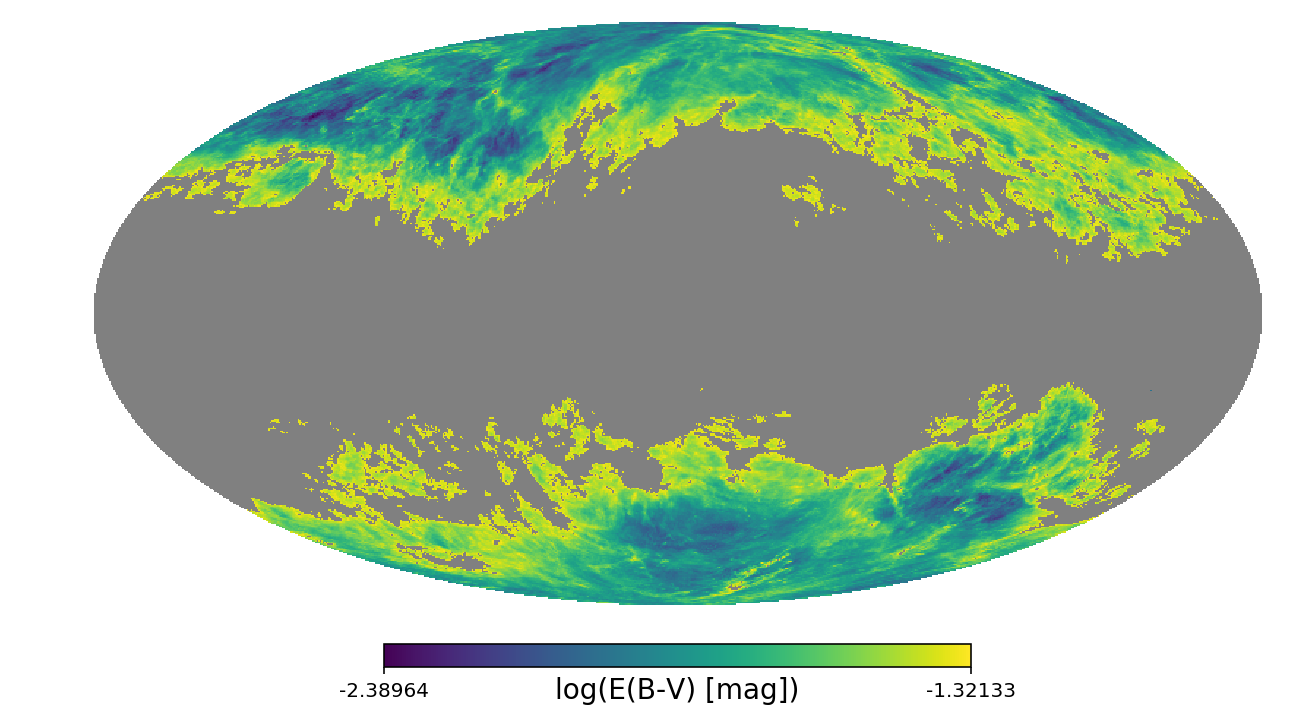

In [4]:
hp.mollview(np.log10(ebv_map), title='', unit='log(E(B-V) [mag])')

# Setting basic healpix parameters
The HEALPix tessellation is fully defined by the nside of the map and the ordering.

In [5]:
nside = hp.get_nside(ebv_map)
npix = hp.nside2npix(nside)
ordering = 'ring'

# Reddening for a particular line of sight
We demonstrate how to use the $E(B-V)$ map and some basic python to extract reddenings along particular lines of sight.

In [6]:
def line_of_sight(lon, lat, coord='Galactic'):
    """
    Computes the reddening along a particular line of sight
    
    Input
    -----
    
    lon : float or 1D-array
        Input longitude in degree
    lat : float or 1D-array
        Input latitude in degree
    coord : 'Galactic' or 'ICRS', defaults to 'Galactic'
        Coordinate system in which lon and lat is evaluated
    
    Returns
    -------
    ebv_los : float or 1D-array
        Reddenings in mag along the line of sight.
        If the returned values are `np.nan`, then the map does not cover this part of the sky

    """
    if coord.lower() == 'icrs':
        s = SkyCoord(
            ra=lon * u.degree,
            dec=lat * u.degree,
            frame='icrs')
        s_gal = s.galactic
        glon = s_gal.l.value
        glat = s_gal.b.value
        print('#####################')
        print('Converted R.A/Dec to l/b, Galactic coordinates are:')
        print('Gal. lon\t Gal. lat')
        print(np.column_stack((glon, glat)))
        print('#####################')
        
    else:
        glon = lon
        glat = lat
    
    # get pixel numbers
    pix = hp.ang2pix(nside, glon, glat, lonlat=True)
    
    # get reddening for these pixels
    ebv_los = ebv_map[pix]

    return ebv_los

In [7]:
ra, dec = [200, 110], [80, 65]
print('E(B-V) for R.A. = {ra}, Dec={dec}:'.format(ra=ra, dec=dec))
print('E(B-V):', line_of_sight(ra, dec, coord='icrs'))

E(B-V) for R.A. = [200, 110], Dec=[80, 65]:
#####################
Converted R.A/Dec to l/b, Galactic coordinates are:
Gal. lon	 Gal. lat
[[121.38232114  37.04216525]
 [151.11417292  27.38809308]]
#####################
E(B-V): [0.03016265        nan]


Note that `np.nan` means that this line of sight is not covered by the reddening map. All reddening values are in magnitudes.

In [8]:
glon, glat = [200, 110], [80, 65]
print('E(B-V) for l={glon}, b={glat}:'.format(glon=glon, glat=glat))
print('E(B-V):', line_of_sight(glon, glat, coord='galactic'))

E(B-V) for l=[200, 110], b=[80, 65]:
E(B-V): [0.01704503 0.00873742]


In [9]:
ebv2A_lambda_df = pd.read_table('conversions.txt', comment='#', index_col=0)

In [10]:
ebv2A_lambda_df.head(10)

,lambda_eff,2.1,3.1,4.1,5.1
Bandpass,,,,,
Landolt U,3508.2,5.614,4.334,3.773,3.460
Landolt B,4329.0,4.355,3.626,3.290,3.096
Landolt V,5421.7,2.953,2.742,2.645,2.589
Landolt R,6427.8,2.124,2.169,2.189,2.201
Landolt I,8048.4,1.410,1.505,1.548,1.573
CTIO U,3733.9,5.170,4.107,3.628,3.355
CTIO B,4308.9,4.382,3.641,3.300,3.104
CTIO V,5516.6,2.857,2.682,2.600,2.553
CTIO R,6520.2,2.055,2.119,2.149,2.166


In [11]:
ebv2A_lambda_df.index

Index(['Landolt U', 'Landolt B', 'Landolt V', 'Landolt R', 'Landolt I',
       'CTIO U', 'CTIO B', 'CTIO V', 'CTIO R', 'CTIO I', 'UKIRT J', 'UKIRT H',
       'UKIRT K', 'UKIRT L"', 'Gunn g', 'Gunn r', 'Gunn i', 'Gunn z',
       'Spinrad R_S', 'Stromgren u', 'Stromgren b', 'Stromgren v',
       'Stromgren beta', 'Stromgren y', 'SDSS u', 'SDSS g', 'SDSS r', 'SDSS i',
       'SDSS z', 'DSS-II g', 'DSS-II r', 'DSS-II i', 'PS1 g', 'PS1 r', 'PS1 i',
       'PS1 z', 'PS1 y', 'PS1 w', 'LSST u', 'LSST g', 'LSST r', 'LSST i',
       'LSST z', 'LSST y', 'WFPC2 F300W', 'WFPC2 F450W', 'WFPC2 F555W',
       'WFPC2 F606W', 'WFPC2 F702W', 'WFPC2 F814W', 'WFC3 F105W', 'WFC3 F110W',
       'WFC3 F125W', 'WFC3 F140W', 'WFC3 F160W', 'WFC3 F200LP', 'WFC3 F218W',
       'WFC3 F225W', 'WFC3 F275W', 'WFC3 F300X', 'WFC3 F336W', 'WFC3 F350LP',
       'WFC3 F390W', 'WFC3 F438W', 'WFC3 F475W', 'WFC3 F475X', 'WFC3 F555W',
       'WFC3 F600LP', 'WFC3 F606W', 'WFC3 F625W', 'WFC3 F775W', 'WFC3 F814W',
       'WFC3 F8

In [12]:
def ebv2A_lambda(ebv, bandpass):
    """
    Converts reddening to extinction in a given
    bandpass, following the values of Schlafy & Finkbeiner (2011, Table 6)
    
    Input
    -----
    ebv : float or ndarray
        Input reddening value or vector
    bandpass : str
        Bandpass for which the extinction is computed. Must be
        part of Schlafly & Finkbeiner (2011, Table 6)
        
    Returns
    -------
    A_lambda : float or ndarray
        Extinction in the selected band, has same shape as input ebv
    
    """

    factor = ebv2A_lambda_df['3.1'][bandpass]
    A_lambda = ebv * factor

    return A_lambda

In [13]:
# 50 mmag
ebv2A_lambda(0.05, 'SDSS g')

0.16515000000000002

In [14]:
# The entire E(B-V) map
A_r_map = ebv2A_lambda(ebv_map, 'SDSS r')

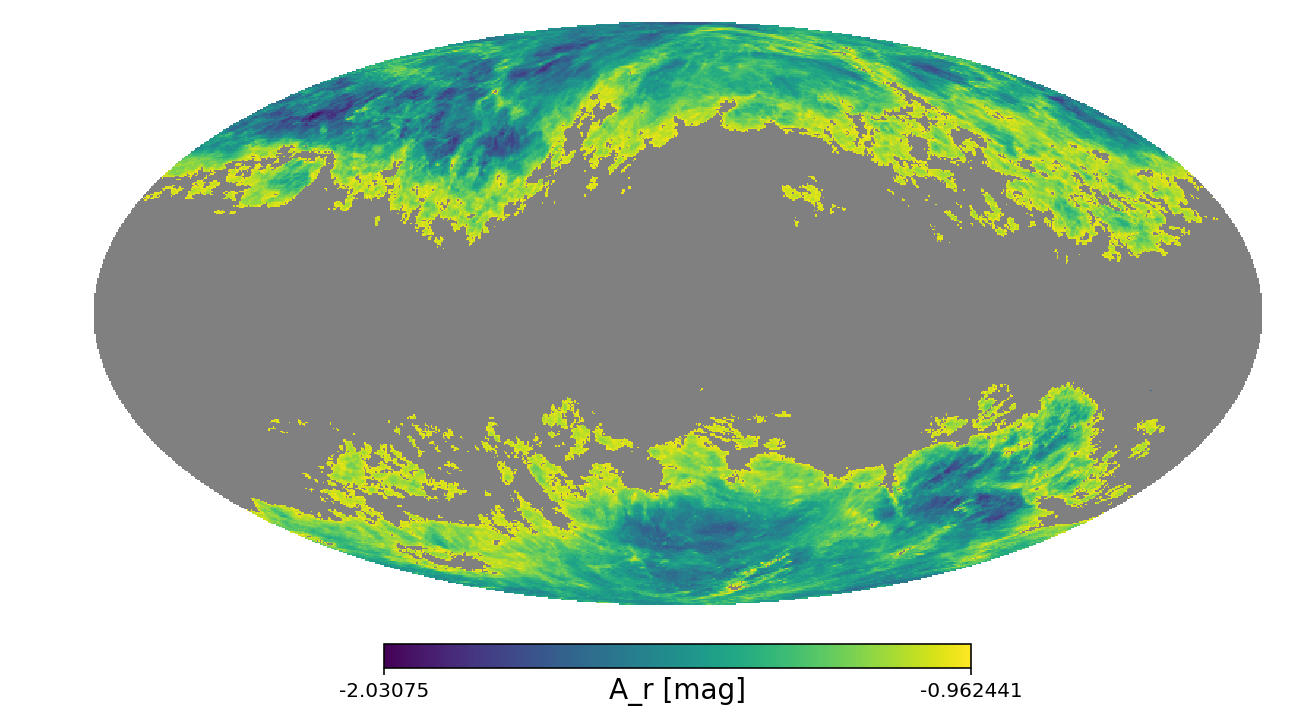

In [15]:
hp.mollview(np.log10(A_r_map), title='', unit='A_r [mag]')

In [5]:
from dustmaps.sfd import SFDQuery
from dustmaps.planck import PlanckQuery
from dustmaps.bayestar import BayestarQuery
import dustmaps.planck
from astropy.coordinates import SkyCoord
from astropy import units as u
dustmaps.planck.fetch()
coords = SkyCoord('12h30m25.3s', '15d15m58.1s', frame='icrs')
planck = PlanckQuery()
ebv = planck(coords)

print('E(B-V) = {:.3f} mag'.format(ebv))

Checking existing file to see if MD5 sum matches ...
File exists. Not overwriting.
E(B-V) = 0.035 mag


In [3]:
HDF_center = SkyCoord.from_name('NAME Hubble Deep Field',frame='galactic')
planck = PlanckQuery()
ebv = planck(HDF_center)

print('E(B-V) = {:.3f} mag'.format(ebv))

E(B-V) = 0.016 mag


In [4]:
import dustmaps.sfd
#dustmaps.sfd.fetch()

In [1]:
from __future__ import print_function
import numpy as np
from astropy.coordinates import SkyCoord
from dustmaps.planck import PlanckQuery
from dustmaps.sfd import SFDQuery
import matplotlib.pyplot as plt

l = np.array([0., 90., 180.])
b = np.array([15., 0., -15.])

coords = SkyCoord(l, b, unit='deg', frame='galactic')

planck = PlanckQuery()
planck(coords)
sfd = SFDQuery()
sfd(coords)

array([0.5566937 , 2.6056938 , 0.37351534], dtype=float32)

In [2]:
l = np.linspace(0., 180., 12)
b = np.zeros(12, dtype='f8')
l.shape = (3, 4)
b.shape = (3, 4)

coords = SkyCoord(l, b, unit='deg', frame='galactic')

planck = PlanckQuery()

ebv = planck(coords)
print(ebv)
print(ebv.shape)

[[315.52438     28.117788    23.530476    20.728292  ]
 [  2.208611    15.685594     1.462332     1.7033854 ]
 [  0.9401388    1.1114084    0.3802344    0.81017196]]
(3, 4)


In [3]:
#c1 = SkyCoord('08h00m00s', 30*u.deg, frame='icrs')
#l0 = c1.ra
#b0 = c1.dec

In [86]:
# we’ll set up a grid of coordinates to plot, centered on the Aquila South cloud
l0, b0 = (120., 30.) # ra of 8hr
l = np.arange(l0 - 5., l0 + 5., 0.05)
b = np.arange(b0 - 5., b0 + 5., 0.05)
l, b = np.meshgrid(l, b)
coords = SkyCoord(l*u.deg, b*u.deg,
                  distance=100.*u.kpc, frame='galactic')
#coords.icrs.ra.hour

In [23]:
sfd = SFDQuery()
Av_sfd = 2.742 * sfd(coords)

planck = PlanckQuery()
Av_planck = 3.1 * planck(coords)

bayestar = BayestarQuery(max_samples=1)

Loading pixel_info ...
Loading samples ...
Loading best_fit ...
Replacing NaNs in reliable distance estimates ...
Sorting pixel_info ...
Extracting hp_idx_sorted and data_idx at each nside ...
  nside = 64
  nside = 128
  nside = 256
  nside = 512
  nside = 1024
t = 17.818 s
  pix_info:   0.390 s
   samples:   4.037 s
      best:   4.124 s
       nan:   0.028 s
      sort:   9.107 s
       idx:   0.132 s


The Hubble Space Telescope (HST) have a "limiting magnitude" $+31.5$ while  James Webb Space Telescope (JWST) has limiting magnitude of $+34$ (from the midterm).Using these known parameters, we will verify whether the region that we have for our reddening analysis can be viewed by these two telescope, given their limiting magnitude determines the  faintest thing they can see. 
(In reality this is not an entirely fair comparison because HST and JWST observe at different wavelengths and are good at different types of science. We also assume that both telescopes locate at some fixed point about the earth, which is not a real scenario as JWST orbit the sun while HST orbits the earth. 

$m_0-M = 5 \log_{10} D_L + 25$, where $D_L$ is measured in Mpc, where $m_0$ is the apparent magnitude with no extinction correction.With extinction, we have $A = m - m_0$, or $m_0 = m - A$. Therefore, we have
$m-M = 5 \log_{10} d +25 + A$ with dust (extinction)

In [31]:
JWST_mag_lim = 34
HST_mag_lim = 31.5
d = 100/1000 kpc to Mpc.
JWST_abs_mags = JWST_mag_lim - 5. * np.log10(d) - 25 - Av_bayestar
HST_abs_mags = HST_mag_lim - 5. * np.log10(d) - 25 - Av_bayestar
np.max(JWST_abs_mags),np.max(HST_abs_mags)

(14.0, 11.5)

In [32]:
f"The faintest thing (at a distance of {d}Mpc from us) that the two telescopes can observe are qualified by the absolute magnitude of {np.max(JWST_abs_mags)} (JWST) and {np.max(HST_abs_mags)}(HST)." 

'The faintest thing (at a distance of 0.1Mpc from us) that the two telescopes can observe are qualified by the absolute magnitude of 14.0 (JWST) and 11.5(HST).'

In [94]:
from astropy.cosmology import Planck15 # Use planck15 data
l0, b0 = (100., 60.) # ra of 8hr
l = np.arange(l0 - 5., l0 + 5., 0.05)
b = np.arange(b0 - 5., b0 + 5., 0.05)
l, b = np.meshgrid(l, b)

z = 0.01  # now test for distances corresponding to redshift z=1 
luminosity_distance = Planck15.luminosity_distance(z)
coords = SkyCoord(l*u.deg, b*u.deg,
                  distance=luminosity_distance, frame='galactic')
v_sfd = 2.742 * sfd(coords)
Av_planck = 3.1 * planck(coords)
Av_bayestar = 2.742 * bayestar(coords)
JWST_mags_dust = JWST_mag_lim - 5. * np.log10(luminosity_distance.value) - 25 - Av_bayestar
HST_mags_dust = HST_mag_lim - 5. * np.log10(luminosity_distance.value) - 25 - Av_bayestar
np.max(JWST_mags_dust),np.max(HST_mags_dust),np.max(Av_bayestar),np.min(Av_bayestar)

(0.7535642, -1.7464358, 0.32904, 0.0)

In [95]:
JWST_mags = JWST_mag_lim - 5. * np.log10(luminosity_distance.value) - 25 
HST_mags = HST_mag_lim - 5. * np.log10(luminosity_distance.value) - 25
np.max(JWST_mags),np.max(HST_mags) # corrections not obvious when z=0.01 

(0.7535641958898651, -1.7464358041101349)

In [96]:
z = 12 # now test for distances corresponding to redshift z=12
luminosity_distance = Planck15.luminosity_distance(z)
coords = SkyCoord(l*u.deg, b*u.deg,
                  distance=luminosity_distance, frame='galactic')
v_sfd = 2.742 * sfd(coords)
Av_planck = 3.1 * planck(coords)
Av_bayestar = 2.742 * bayestar(coords)
JWST_mags_dust = JWST_mag_lim - 5. * np.log10(luminosity_distance.value) - 25 - Av_bayestar
HST_mags_dust = HST_mag_lim - 5. * np.log10(luminosity_distance.value) - 25 - Av_bayestar
np.max(JWST_mags_dust),np.max(HST_mags_dust),np.max(Av_bayestar),np.min(Av_bayestar)
# same max/min dust magnitude as for z=0.01 --> extinction largely dependent on ra/dec that looking at a different area (differnt line of sight)

(-16.57688, -19.07688, 0.32904, 0.0)

In [97]:
JWST_mags = JWST_mag_lim - 5. * np.log10(luminosity_distance.value) - 25 
HST_mags = HST_mag_lim - 5. * np.log10(luminosity_distance.value) - 25
np.max(JWST_mags),np.max(HST_mags) # corrections not obvious when z=12

(-16.576880056437453, -19.076880056437453)

In [12]:
Av_bayestar

array([[0.35646   , 0.32904   , 0.43872002, ..., 0.79518   , 0.52098   ,
        0.46614003],
       [0.35646   , 0.46614003, 0.43872002, ..., 0.79518   , 0.98712   ,
        0.46614003],
       [0.46614003, 0.46614003, 0.46614003, ..., 0.98712   , 0.98712   ,
        0.98712   ],
       ...,
       [0.10968   , 0.1371    , 0.1371    , ..., 0.32904   , 0.32904   ,
        0.46614003],
       [0.10968   , 0.2742    , 0.1371    , ..., 0.32904   , 0.32904   ,
        0.46614003],
       [0.2742    , 0.2742    , 0.2742    , ..., 0.32904   , 0.32904   ,
        0.32904   ]], dtype=float32)

In [13]:
Av_planck

array([[0.31091398, 0.32299206, 0.3541214 , ..., 0.6064197 , 0.55510277,
        0.5425213 ],
       [0.31670463, 0.31949842, 0.32873103, ..., 0.6515285 , 0.6247903 ,
        0.59890586],
       [0.32999215, 0.3264332 , 0.3251827 , ..., 0.7517792 , 0.72986853,
        0.6809296 ],
       ...,
       [0.1098033 , 0.11558973, 0.12224378, ..., 0.3288521 , 0.34501493,
        0.34949607],
       [0.1074846 , 0.11362812, 0.11771673, ..., 0.3401173 , 0.34229612,
        0.31091833],
       [0.10884585, 0.11139025, 0.11296088, ..., 0.32277077, 0.27502447,
        0.25853154]], dtype=float32)

In [14]:
Av_sfd 

array([[0.3179191 , 0.3265816 , 0.3433204 , ..., 0.9075357 , 0.88131744,
        0.863724  ],
       [0.31586576, 0.31920037, 0.32719335, ..., 1.0258015 , 0.9549061 ,
        0.9309691 ],
       [0.3163747 , 0.31561196, 0.31476048, ..., 1.1423644 , 1.0771791 ,
        1.0147268 ],
       ...,
       [0.07645011, 0.07895393, 0.08123443, ..., 0.32738656, 0.32938042,
        0.32353932],
       [0.07463293, 0.0771045 , 0.07894801, ..., 0.32087234, 0.3134119 ,
        0.29840693],
       [0.07281738, 0.07509438, 0.0769411 , ..., 0.29806986, 0.28125557,
        0.25769022]], dtype=float32)

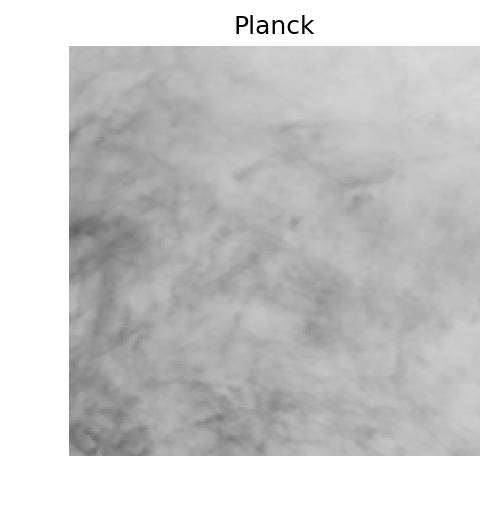

In [16]:
fig = plt.figure(figsize=(12,4), dpi=150)
for k,(Av,title) in enumerate([(Av_planck, 'Planck')]):
    ax = fig.add_subplot(1,3,k+1)
    ax.imshow(
        np.sqrt(Av_planck)[::, ::-1],
        vmin=0.,
        vmax=2.,
        origin='lower',
        interpolation='nearest',
        cmap='binary',
        aspect='equal'
    )
    ax.axis('off')
    ax.set_title(title)

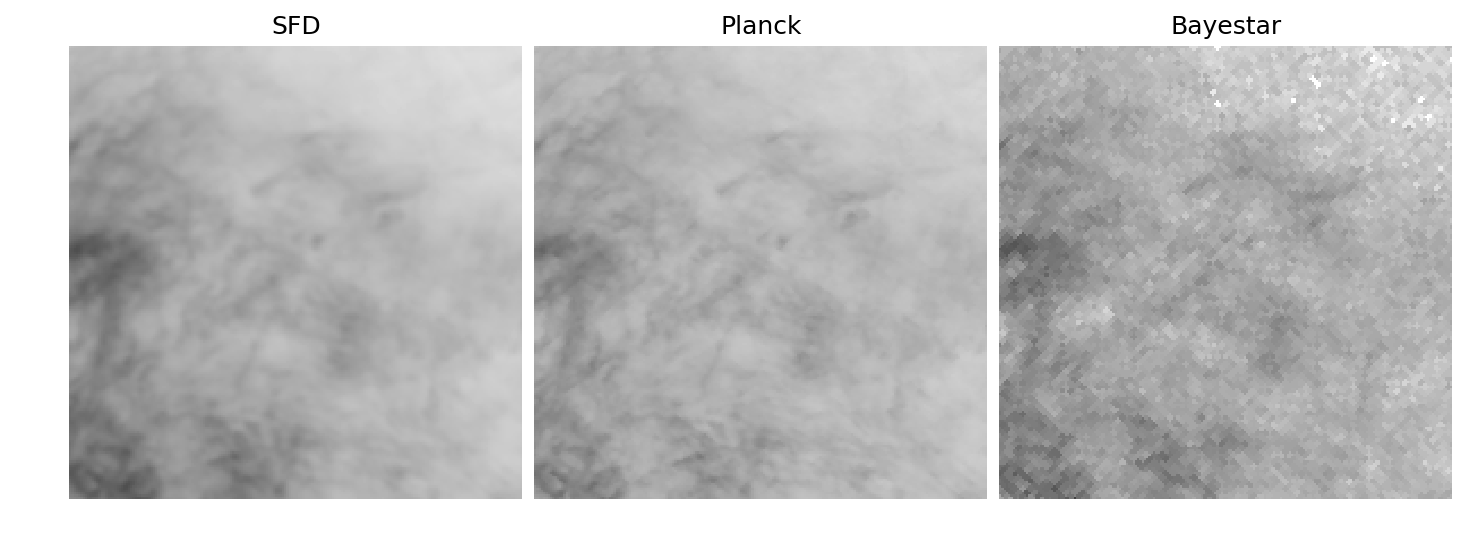

In [17]:
fig = plt.figure(figsize=(12,4), dpi=150)

for k,(Av,title) in enumerate([(Av_sfd, 'SFD'),
                               (Av_planck, 'Planck'),
                               (Av_bayestar, 'Bayestar')]):
    ax = fig.add_subplot(1,3,k+1)
    ax.imshow(
        np.sqrt(Av)[::,::-1],
        vmin=0.,
        vmax=2.,
        origin='lower',
        interpolation='nearest',
        cmap='binary',
        aspect='equal'
    )
    ax.axis('off')
    ax.set_title(title)

fig.subplots_adjust(wspace=0., hspace=0.)
plt.savefig('comparison.png', dpi=150)